# Homework 6 - 60 points

Import all the libraries we'll need for this homework

In [1]:
import numpy as np
import scipy.signal
import pandas as pd
import scipy.fftpack
import matplotlib.pyplot as plt

In class we used FFT to find the period of the sunspot cycle. Let's review how we did that.

Text(0.5,1,'Solar Sunspot Cycle')

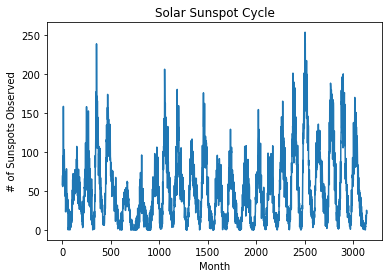

In [2]:
# read in the sunspot data. this assumes that sunspots.txt has already 
# been uploaded to Jupyter Hub and is in the same folder as this notebook
#
# the data file sunspots.txt is available on Joule
data = pd.read_csv('sunspots.txt', sep = '\s+')

# create an x-axis to plot the sunspot number against
x = np.arange(0, len(data['sunspots']), 1)

# visualize the data
plt.plot(x, data['sunspots'])
plt.xlabel('Month')
plt.ylabel('# of Sunspots Observed')
plt.title('Solar Sunspot Cycle')

Looks like there's a pattern there. The sunspot number clearly increases and decreases at a consistent rate. But, what is that rate? Transforming to frequency space will help us determine the answer.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


Text(0,0.5,'Magnitude')

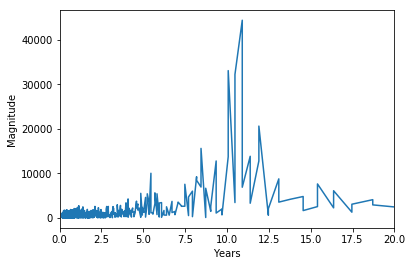

In [3]:
# compute the FFT on sunspot data
# transforms from temporal space (how the number of sunspots varies over time)
# to frequency space (at what rate do sunspots increase/decrease)
fft = scipy.fftpack.rfft(data['sunspots'])
freqs = scipy.fftpack.rfftfreq(len(fft)) 

# frequency is given Hertz, which has units 1/seconds or per second
# 1./frequency gets us the period, which is in seconds
period = 1./freqs

# our sunspot data is in months, let's divide by 12 to get the x-axis in years
p_years = period/12.

# visualize the results of the FFT
plt.plot( p_years, abs(fft) )
plt.xlim(0,20)
plt.xlabel('Years')
plt.ylabel('Magnitude')

There are several peak, which is telling us that there are several overlapping sunspot cycles. Yet, one peak clearly stands out above the rest. This is the Sun's dominant [11-year sunspot cycle](https://en.wikipedia.org/wiki/Solar_cycle). 

The Fourier Transform, and it's implementation in FFT, transforms from a temporal representation to a frequency representation. It tells us if there are repeating waves in our data and, if there are, how frequently they repeat. Can we apply this to something a little more down to Earth? How about the stock market? Are there any repeating waves there? If yes, what are they and can we take advantage of them for investing?

1.) (4 points) The Dow Jones Industrial Average (DJIA) is the average of 30 significant stocks traded on the New York Stock Exchange (NYSE) and the Nasdaq. The movement of the DJIA over time gives an indication of the overall health of the stock market. If DJIA is decreasing then many of the largest companies in the U.S. are losing value. IF DJIA is increasing then the largest companies in the U.S. are increasing in value.

The data file dow_2004_to_2008.txt contains one column of data - the DJIA each day from January, 1 2004 through December 31, 2008.

Read this data into a variable and visualize the DJIA. You can use an arbitrary x-axis (it doesn't have to specifically list the date).

<b>The two DJIA data files needed for this homework are on Joule</b>

In [4]:
# code here

Ok, we can see an overall upward trend and some cyclical activity. Is there a dominant frequency in there?

2.) (6 points) Compute the FFT on this data and plot the results. Plot period instead of frequency on the x-axis. Be sure to label both the x and y axes of your plot

In [10]:
# code here

3.) (6 points) What are your interpretations of the results? Is there a dominant frequency/period?

4.) (4 points) The file dow_2006_to_2010.txt contains the same DJIA daily data, but this time for the years 2006 to 2010. Repeat what you did in 1.) and visualize this data. Be sure to label both the x and y axes of your plot

In [11]:
# code here 

5.) (6 points) Repeat what you did in 2.) Compute the FFT of the 2006-2010 data and visualize the results

In [7]:
# code here

6.) (4 points) Create a multi-panel plot with the 2004-2008 FFT data in the top panel and the 2006-2010 FFT data in the bottom panel

In [12]:
# code here 

7.) (6 points) What do you think? Is there a repeating pattern in the DJIA? Are any dominant frequencies seen in 2004-2008 still there in 2006-2010? Could this be used as an indicator of how stocks will perform - timing when they'll increase and when they'll decrease? Would you invest based on these results?

8.) (5 points) Let's try one more thing. There's a lot of day-to-day fluctuations in the DIJA data. Let's try smoothing the data and computing the FFT on the smoothed DIJA.

Apply the smoothing function scipy.signal.savgol_filter() to the 2006-2010 DIJA data. You can call it as: ynew = scipy.signal.savgol_filter(djia_2006_2010, 51, 3). The input values 51 and 3 signify that we want to smooth by using a sliding window 51 points wide and we'll use a 3rd order polynomial.

Plot the smoothed data on top of the original data (same plot). Color the smoothed data red.

9.) (6 points) Compute, and plot, the FFT of the smoothed DIJA data.

In [13]:
# code here

10.) (4 points) How do you interpret these results? Are they the same as what you got in question 6? Does this change your answer to question 7?

Now, we're going to return to our sunspot data. The sunspot FFT is reproduced again in the next cell.

Text(0,0.5,'Magnitude')

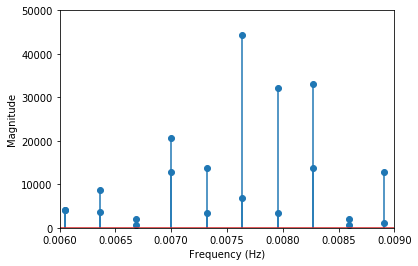

In [75]:
fft = scipy.fftpack.rfft(data['sunspots'])
freqs = scipy.fftpack.rfftfreq(len(fft)) 
plt.stem( freqs, abs(fft) )
plt.xlim(0.006,.009)
plt.ylim(0,50000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

11.) (4 points) The [Dalton Minimum](https://en.wikipedia.org/wiki/Dalton_Minimum) was a period of low sunspot count, representing low solar activity, named after the English meteorologist John Dalton. The Dalton Minimum lasted from about 1790 to 1830.

Our sunspot data begins in 1749. We should be able to see the Dalton Minimum in our data. Use a <b>spectrogram</b> to identify the Dalton Minimum. You can use just data['sunspots'] as the input to the spectrogram. For example, scipy.signal.spectrogram(data['sunspots'])

In [9]:
# code here

12.) (5 points) Discuss what the spectrogram is showing and how we can use it to identify the Dalton Minimum